In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [57]:
df[['Income($)']]

,Income($)
0,70000
1,90000
2,61000
3,60000
4,150000
5,155000
6,160000
7,162000
8,156000
9,130000


In [58]:
df = df.drop(['Name'], axis = 'columns')
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


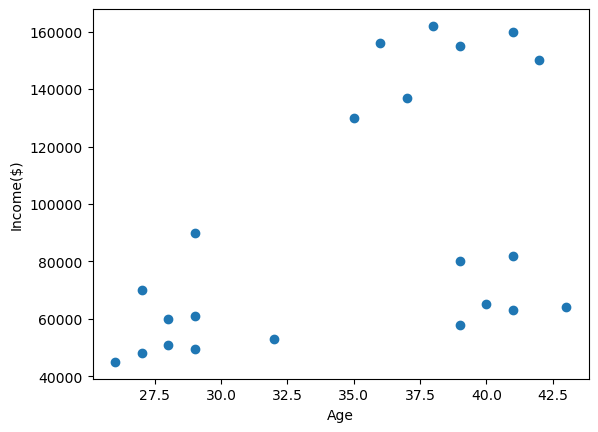

In [59]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df.Age, df['Income($)'])

In [60]:
from sklearn.cluster import KMeans

In [61]:
km = KMeans(n_clusters = 3, n_init = 'auto')
y_predicted = km.fit_predict(df)
y_predicted

C:\Users\Varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [62]:
#Append the cluster value to the df
df['cluster'] = y_predicted
df.head()

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [63]:
#To find out the centroid of clusters
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [64]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

In [65]:
df1

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
19,39,80000,0
20,41,82000,0


In [66]:
df2

,Age,Income($),cluster
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1
10,37,137000,1


In [67]:
df3

,Age,Income($),cluster
2,29,61000,2
3,28,60000,2
11,26,45000,2
12,27,48000,2
13,28,51000,2
14,29,49500,2
15,32,53000,2
16,40,65000,2
17,41,63000,2
18,43,64000,2


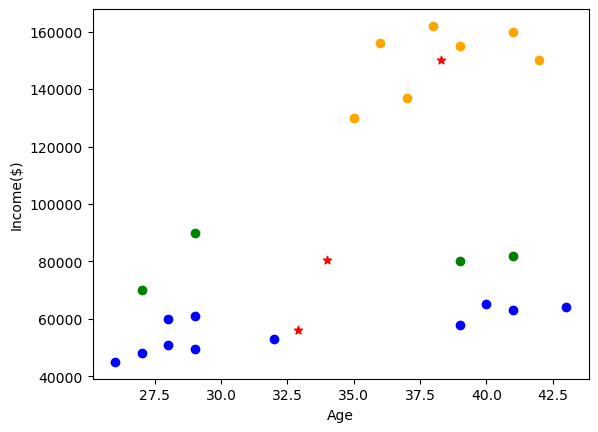

In [68]:
plt.scatter(df1.Age, df1['Income($)'], color ='green')
plt.scatter(df2.Age, df2['Income($)'], color ='orange')
plt.scatter(df3.Age, df3['Income($)'], color ='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'red', marker = '*',label = 'centroid')

In [71]:
#Preprocessing using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [75]:
scaler.fit(df[['Age']]) 
df['Age'] = scaler.transform(df[['Age']])

In [76]:
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


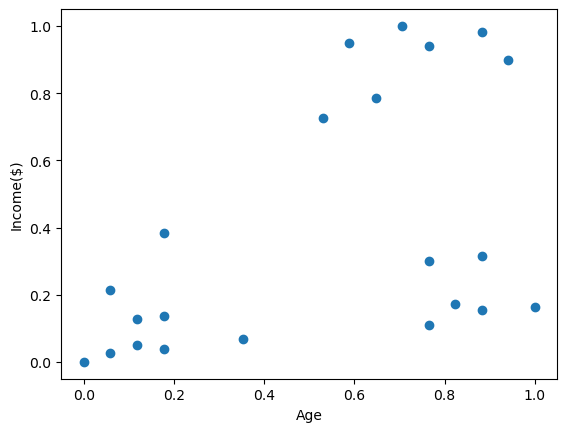

In [77]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df.Age, df['Income($)'])

In [78]:
km = KMeans(n_clusters = 3, n_init = 'auto')
y_predicted = km.fit_predict(df)
y_predicted

C:\Users\Varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [79]:
km.cluster_centers_

array([[0.47058824, 0.3034188 , 0.        ],
       [0.40641711, 0.0951826 , 2.        ],
       [0.72268908, 0.8974359 , 1.        ]])

In [80]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

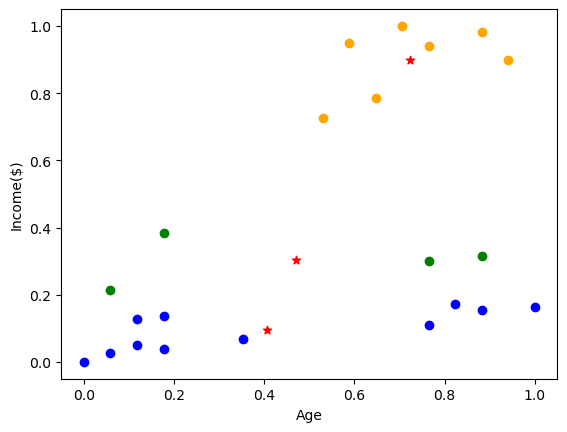

In [81]:
plt.scatter(df1.Age, df1['Income($)'], color ='green')
plt.scatter(df2.Age, df2['Income($)'], color ='orange')
plt.scatter(df3.Age, df3['Income($)'], color ='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'red', marker = '*',label = 'centroid')

In [86]:
#Elbow plot
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) #km.inertia_ gives Sum of Squared Error amd we want to append it to our array we have

C:\Users\Varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [87]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472496,
 0.17840674931327935,
 0.1327661931978319,
 0.10497488680620909]

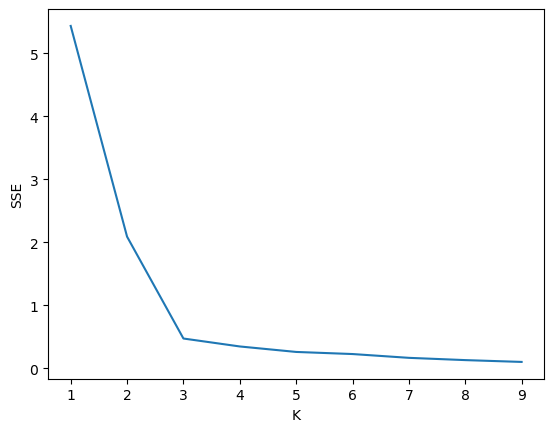

In [85]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)